# Assignment 4
## Kunal Naidu
## 30020999


# Introduction


The engery reguired to align a magnetic dipole in a magnetic field is given by 

$$U = - \vec m \cdot \vec B = - m B \cos\theta $$

Where $U$ is the energy, $m$ is the magnetic dipole, $B$ is the magnetic field, and $\theta$ is the angle between the dipole moment and field direction.

When the angle between the magnetic field and the dipole is paralell. The potential enegery would be a minimum at 

  $$ U = - m B $$
  
When the angle between the magnetic field and the dipole is opposite from eachother. The potential energy would be a maximum at

  $$ U = + m B $$
  


The probability of the states of a small system in thermal equilibrium with a "heat sink" follows the Boltzman distribution.

$$ p(\mathbf x) \propto \exp \left(-\frac{E(\mathbf x)}{k T}\right) $$

Where E is the energy, T is the temperture of the "heat sink", and x is the state. X can be considered a state or a vector of states.

If we consider two arbitrary states with Energies $E_1$ and $E_2$

  $$ p_1 \propto \exp \left(-\frac{E_1}{k T}\right) $$

  $$ p_2 \propto \exp \left(-\frac{E_2}{k T}\right) $$
  
These probabilities aren't nomalized. So they don't add to 1. This makes sense because the probabilities are defined as relations. So they're missing a constant to make them equal to one. This constant can be found.

$$ C\, \exp \left(-\frac{E_1}{k T}\right) + C\, \exp \left(-\frac{E_2}{k T}\right) = 1 $$

Where C is a constant. $C$ can be solved to get

$$ C = \frac{1}{e^{\left( -\frac{E_1}{k T} \right)}
+ e^{\left( -\frac{E_2}{k T} \right)}} $$

But for more simplicity the inverse can be used and called $Z$

$$ Z = e^{\left( -\frac{E_1}{k T} \right)}
+ e^{\left( -\frac{E_2}{k T} \right)} $$

$\beta$ can also be defined to further simply

$$ \beta = \frac{1}{k_B T}  $$

Now looking back at the probability equation with the new constant,

$$ p_k = \frac{e^{-\beta E_k}}{Z} $$


The relative probability can be also calculated which doesn't need us to care about the constant $C$.

$$ r = \frac{p_f}{p_i} \propto e^{(E_2-E_1)/kT} $$

Lets define $E_+$ and $E_-$ to be the engery of spin up and spin down respectively. Since we know that the energies are of equal magnitude of opposite direction. The change in energy would be 

$$ \Delta E = E_+ - E_- = 2E $$

We can also calculate the probability for spin up and spin down.

 $$ p_+ = \frac{1}{1 + \exp(-\beta \Delta E )} $$
 
 $$ p_- = \frac{1}{1 + \exp(+\beta \Delta E )} $$
 
For a group of dipoles wtih states +1 and -1 in a external magnetic field the engery is

$$ E = -B \sum_k S_k $$

We have 4 different possiblilites for two different states. 

      S1  S2   Energy  Probability (un-normalized)
     +1  +1   -2B      exp(+beta 2B)
     +1  -1    0B      1
     -1  +1    0B      1
     -1  -1    2B      exp(-beta 2B)
     
Although there is only 3 different energy configurations.

Using these 3 different engery configurations, we can calculate the individual probabilities for these states to be.

 $$ p_i = \frac{e^{-E/T}}{Z} $$
 
where,

$$ Z = \exp(-2B \beta) + 2 \exp(0) + \exp(+2B \beta) $$

For an arbitrary number of N dipoles the partition function is defined as

$$Z=\sum_i^N e^{-\beta*E_i}$$

In [1]:
from itertools import permutations
import numpy as np
import scipy.constants
import pandas as pd
import timeit
import matplotlib.pyplot as plt

In [2]:
def combinations(N):
    """
    Determines all possible combinations of values of +1 and -1 for 1 dimentional N-sized array
    
    Parameters
    ----------
    
    N: number of values in array
    
    Returns
    -------
    
    unique_outcomes: list of all the possible combinations of values for the N-sized array
    
    """
    outcomes=[]
    all_negative=np.full(N,-1)
    outcomes=outcomes+list(permutations(all_negative))
    for i in range(N):
        all_negative[i]=1
        outcomes=outcomes+list(permutations(all_negative))
    unique_outcomes=list(set(outcomes))
    return unique_outcomes

In [3]:
def energy_state(unique_combinations,B):
    """
    Determines Energy State for an arbritary list of dipoles
    
    Parameters
    ----------
    
    unique_combinations: list of arbitrary lists of dipoles
    
    B: External Magnetic Field
    
    Returns
    -------
    
    energy: list of the energies for the arbitrairy list of dipoles
    
    """
    energy=[]
    for i in unique_combinations:
        s=sum(i)
        energy.append(-B*s)
    return energy
    

In [4]:
def probability(N,B,beta):
    """
    Determines the probability for an configurations of dipoles
    
    Parameters
    ----------
    
    N: Number of independent dipoles
    
    B: External Magnetic Field
    
    beta: relationship between 1/(k_B*T)
    
    Returns
    -------
    
    p_i: list of the probabilities of different configurations
    
    e: list of the energy of different configurations
    
    c: list of all the possible combinations of values for the N-sized array
    
    """
    p_i=[]
    c=combinations(N)
    e=energy_state(c,B)
    z=0
    for i in e:
        z+=np.exp(-beta*i)
    for i in e:
        #p_numerator=np.exp(-i*beta*scipy.constants.Boltzmann)
        p_numerator=np.exp(-i*beta)
        p_i.append(p_numerator/z)
    return p_i,e,c

In [5]:
a=probability(3,2,0.1)
pd.DataFrame({'States':a[2],'Energy':a[1],'Probability':a[0]})

,States,Energy,Probability
0,"(1, 1, -1)",-2,0.143841
1,"(-1, 1, 1)",-2,0.143841
2,"(1, -1, -1)",2,0.096420
3,"(-1, -1, 1)",2,0.096420
4,"(-1, -1, -1)",6,0.064632
5,"(-1, 1, -1)",2,0.096420
6,"(1, -1, 1)",-2,0.143841
7,"(1, 1, 1)",-6,0.214586


In [6]:
def random_state(N,B=2,beta=0.1):
    """
    Randomly chooses a state with the probabilities of Boltzmann distribution.
    
    Parameters
    ----------
    
    N: Number of independent dipoles
    
    B: External Magnetic Field
    
    beta: relationship between 1/(k_B*T)
    
    Returns
    --------
    
    state_actual= random state
    
    """
    data=probability(N,B,beta)
    state_number = np.random.choice(range(len(data[2])), p=data[0])
    state_actual=data[2][state_number]
    return state_actual

In [7]:
random_state(3)

(-1, 1, 1)

In [8]:
n=100
time_N=[]
N_range=range(2,10)
for i in N_range:
    function=str(random_state(i))
    t=timeit.timeit(function,setup='from __main__ import random_state', number=n)
    time_N.append(t)

Text(0,0.5,'Probability')

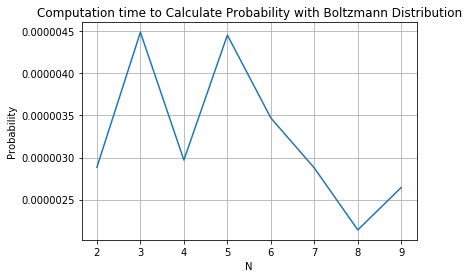

In [9]:
plt.plot(N_range,time_N)

plt.grid('on')
plt.title('Computation time to Calculate Probability with Boltzmann Distribution')
plt.xlabel('N')
plt.ylabel('Probability')


If we look at the Metropolis Algorithim, we can find a different approach to this problem. With this approach we will look at an initial energy $E_0$ and will be changing it to $E_1$ and be calculating probability that it will stay in this state. We will be looking at the following equation/code:


$$p=min(1,e^{-\frac{\Delta E}{T}})$$

where $$ \Delta E=E_1−E_0$$

If at a higher energy state then there will always be a flip to a lower energy state. If at a lower energy state there is a probability that it might flip into a higher energy state. The transition from lower energy state to higher energy state is more probable at higher tempertures.


In [10]:
def metropolis(dE,T):
    p=min(1,np.exp(-dE/T))
    return p

In [11]:
dE=[0.1,1.0,10.0]
for E in dE:
    print(metropolis(E,300))

0.9996667222160499
0.9966722160545233
0.9672161004820059


In [15]:
#boltzmann_1d=probability(1,2,0.1)
#pd.DataFrame({'States':boltzmann_1d[2],'Energy':boltzmann_1d[1],'Probability':boltzmann_1d[0]})

In [27]:
def random_state_m(dE,T):
    state=[]
    Probability_M_plus1=metropolis(dE,T)
    Probability_M_minus1=1-Probability_M_plus1
    itterations=1000
    for values in range(itterations):
        state_number = np.random.choice([1,-1], p=[Probability_M_plus1,Probability_M_minus1])
        state.append(state_number)
    return state, itterations

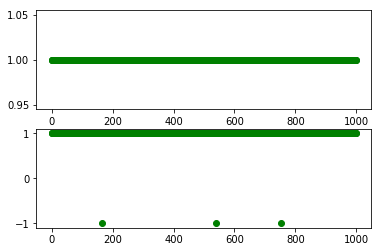

In [41]:
dE=[0.1,1.0,10.0]
T=300
data={}
position=[411,412,]
for values in dE:
    data[values]=random_state_m(values,T)

plt.figure(1)
for i,j,k in zip(data.keys(),dE,position):
    plt.subplot(k)
    plt.plot(range(data[i][1]),data[i][0],"go",label=str(j))
 


In [ ]:
plt.plot(range(itterations),state,"go")
plt.grid('on')
plt.title('State Over Several Itterations With B=2 and T=300')
plt.xlabel('Itterations')
plt.ylabel('State')